# Exoplanet.eu Database

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import MultipleLocator
import seaborn as sns

custom_params = {"xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "font.family":"Helvetica",
                 "font.size":12.0,
                 "legend.frameon":False,
                 "legend.labelspacing":0,
                 "legend.markerscale":1.5}

sns.set_theme(style='ticks', rc=custom_params)

In [2]:
# import data
csv_name = "exoplanet.eu_catalog.csv"
data = pd.read_csv(csv_name)

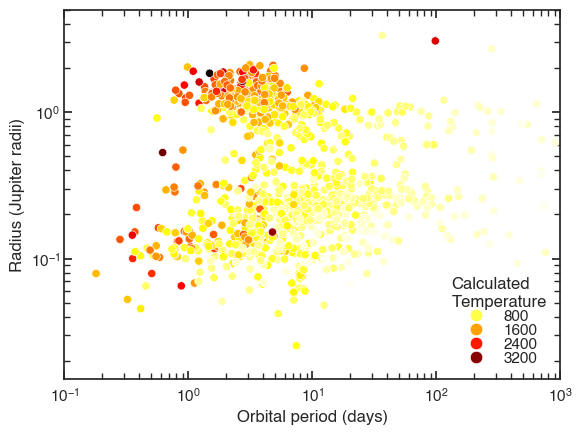

In [4]:
s = sns.scatterplot(data=data, x='orbital_period', y='radius', hue='temp_calculated', palette="hot_r")

s.set(xscale='log', xlabel='Orbital period (days)', xlim=(1e-1, 1e3),
      yscale='log', ylabel='Radius (Jupiter radii)', ylim=(1.5e-2, 0.5e1))
plt.legend(title='Calculated\nTemperature', loc='lower right')

In [5]:
solar_system = {'Planet':['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
                'Temperature': [440, 737, 288, 208, 163, 133, 78, 72],
                'Radius':[0.383 / 11.21, 0.949 / 11.21, 1.0 / 11.21, 0.532 / 11.21, 1, 9.45 / 11.21, 4.01 / 11.21, 3.88 / 11.21],
                'Colour':['darkgrey', 'darkorange', 'limegreen', 'crimson', 'goldenrod', 'blanchedalmond', 'c','navy']}

sol = pd.DataFrame(solar_system)

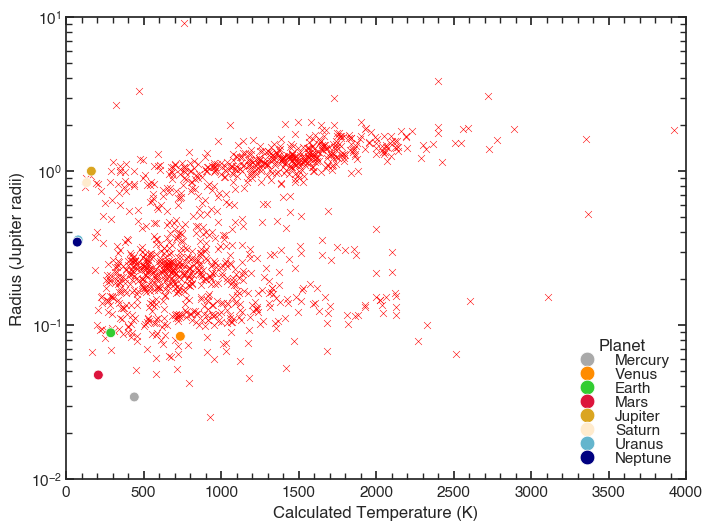

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
exo = sns.scatterplot(data=data, x='temp_calculated', y='radius', marker='x', s=25, color='red', ax=ax)

exo.set(xlabel='Calculated Temperature (K)', xlim=(0, 4000),
      yscale='log', ylabel='Radius (Jupiter radii)', ylim=(1e-2, 1e1))

sol = sns.scatterplot(data=sol, x='Temperature', y='Radius', hue='Planet', palette=sns.color_palette(sol['Colour']), s=50, ax=ax)

plt.savefig('plots/Radius_Temp_wSol.png')

In [7]:
discoveries_year = data['discovered'].value_counts()
cumulative_discoveries = discoveries_year.sort_index().cumsum()
cumulative_discoveries.index = cumulative_discoveries.index.astype(int)

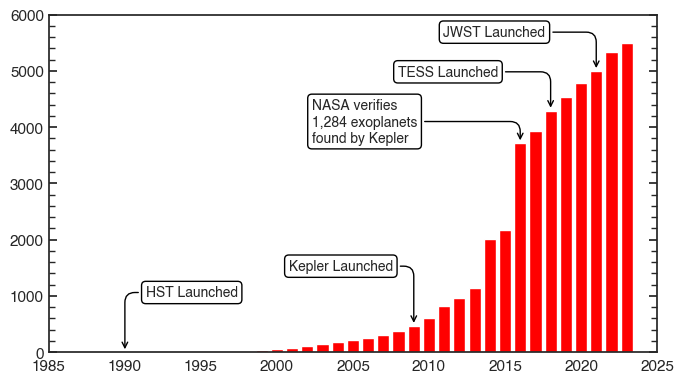

In [9]:
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(cumulative_discoveries.index, cumulative_discoveries.values, color='red')
ax.set_ylim(0,6000)
ax.set_xlim(1985, 2025)

ax.annotate(
    'HST Launched',
    xy=(1990, 0), xycoords='data',
    xytext=(15, 40), textcoords='offset points', size=10,
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"),
    arrowprops=dict(arrowstyle="->", color='black',
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate(
    'Kepler Launched',
    xy=(2009, cumulative_discoveries[2009]), xycoords='data',
    xytext=(-90, 40), textcoords='offset points', size=10,
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"),
    arrowprops=dict(arrowstyle="->", color='black',
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate(
    'NASA verifies\n1,284 exoplanets\nfound by Kepler',
    xy=(2016, cumulative_discoveries[2016]), xycoords='data',
    xytext=(-150, 1), textcoords='offset points', size=10,
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"),
    arrowprops=dict(arrowstyle="->", color='black',
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate(
    'TESS Launched',
    xy=(2018, cumulative_discoveries[2018]), xycoords='data',
    xytext=(-110, 25), textcoords='offset points', size=10,
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"),
    arrowprops=dict(arrowstyle="->", color='black',
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate(
    'JWST Launched',
    xy=(2021, cumulative_discoveries[2021]), xycoords='data',
    xytext=(-110, 25), textcoords='offset points', size=10,
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"),
    arrowprops=dict(arrowstyle="->", color='black',
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))


ax.xaxis.set_tick_params(which='both', top=False, bottom=False)
#ax.xaxis.set_tick_params(which='major', visible=False)
plt.tight_layout()
plt.savefig('Plots/Cumulative_Discoveries.png')


In [10]:
hot_nep_des = data[data['temp_calculated_error_max'] <= 0.05 * data['temp_calculated']]
hot_nep_des['mass_E'] = hot_nep_des['mass']*317.8
hot_nep_des['radius_E'] = hot_nep_des['radius']*10.98
#hot_nep_des = hot_nep_des[hot_nep_des['radius_E']<30]

hot_nep_des['category'] = None
hot_nep_des.loc[hot_nep_des['radius_E']>=7, 'category'] = 'Gas Giant'
hot_nep_des.loc[(hot_nep_des['radius_E']<7) & (hot_nep_des['radius_E']>2), 'category'] = 'Neptune-like'
hot_nep_des.loc[(hot_nep_des['radius_E']<2) & (hot_nep_des['mass_E']>1), 'category'] = 'Super-Earth'
hot_nep_des.loc[(hot_nep_des['radius_E']<2) & (hot_nep_des['mass_E']<=1), 'category'] = 'Terrestrial'

C:\Users\Marco\AppData\Local\Temp\ipykernel_7904\2820558707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_nep_des['mass_E'] = hot_nep_des['mass']*317.8
C:\Users\Marco\AppData\Local\Temp\ipykernel_7904\2820558707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_nep_des['radius_E'] = hot_nep_des['radius']*10.98
C:\Users\Marco\AppData\Local\Temp\ipykernel_7904\2820558707.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [11]:
planets_palette = {
    'Gas Giant': 'orange',
    'Neptune-like': 'dodgerblue',
    'Super-Earth': 'deeppink',
    'Terrestrial': 'green',
}
planets_markers = {
    'Gas Giant': 'o',
    'Neptune-like': 'X',
    'Super-Earth': 'p',
    'Terrestrial': '^',
}

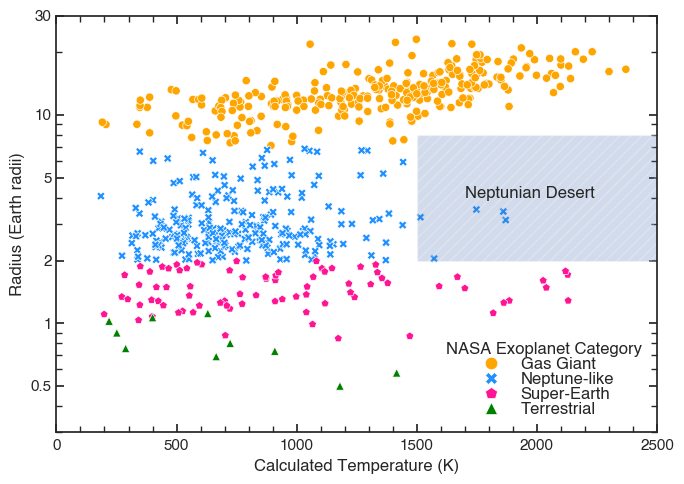

In [12]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=hot_nep_des,
                x='temp_calculated',
                y='radius_E',
                style='category',
                markers=planets_markers,
                hue='category', 
                hue_order=planets_palette.keys(), 
                palette=planets_palette)

ax.set_xlim(0,2500)
ax.set_xlabel('Calculated Temperature (K)')

ax.set_yscale('log')
y_ticks = [0.5, 1, 2, 5, 10, 30] 
y_labels = ['0.5', '1', '2', '5', '10', '30']
plt.yticks(y_ticks, y_labels)
ax.set_ylim(0.3,30)
ax.set_ylabel('Radius (Earth radii)')

legend = ax.legend(title='NASA Exoplanet Category', loc='lower right', prop={'size':12})
legend.get_title().set_fontsize(12)

el = patches.Rectangle((1500, 2), 1000, 6, facecolor='b', alpha=0.25, hatch='///')
ax.add_artist(el)
ax.annotate(
    'Neptunian Desert',
    xy=(1700, 4), xycoords='data',
    xytext=(1700, 4), textcoords='data',
    size=12)

plt.tight_layout()
plt.savefig('Plots/Radius_Temp.png')

In [13]:
#Ultra_hot_J = data[data['temp_calculated_error_max'] <= 0.05 * data['temp_calculated']]
Ultra_hot_J = data
Ultra_hot_J = Ultra_hot_J[Ultra_hot_J['radius']>=1]

In [14]:
Ultra_hot_J = Ultra_hot_J[Ultra_hot_J['temp_calculated']>=2500]
Ultra_hot_J.shape

(10, 98)

In [15]:
Ultra_hot_J['temp_perct_error'] = Ultra_hot_J['temp_calculated_error_max'] / Ultra_hot_J['temp_calculated'] * 100

In [16]:
Ultra_hot_J['temp_calculated'].sort_values(ascending=False)

1875    3921.0
5295    3353.0
4884    2892.0
5314    2782.0
573     2730.0
4761    2722.0
5222    2593.0
502     2562.0
1988    2550.0
5206    2508.0
Name: temp_calculated, dtype: float64

In [23]:
Hot_Nep = data
Hot_Nep = Hot_Nep[(Hot_Nep['radius']>2)&(Hot_Nep['radius']<7)]
Hot_Nep = Hot_Nep[Hot_Nep['temp_calculated']>500]

In [27]:
len(Hot_Nep)

7

### Presentation Plots

In [18]:
custom_params = {"axes.labelsize": 16.0,
                 "xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "xtick.labelsize":16.0,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "ytick.labelsize":16.0,
                 "font.family":"Helvetica",
                 "font.size":16.0,
                 "lines.linewidth":2,
                 "legend.frameon":False,
                 "legend.labelspacing":0,
                 "legend.borderpad":0.5,
                 "legend.fontsize":16.0}

sns.set_theme(style='ticks', rc=custom_params)

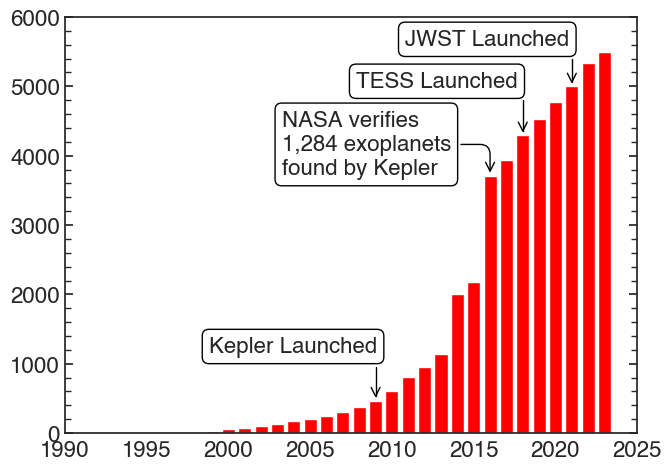

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(cumulative_discoveries.index, cumulative_discoveries.values, color='red')
ax.set_ylim(0,6000)
ax.set_xlim(1990, 2025)

ax.annotate(
    'Kepler Launched',
    xy=(2009, cumulative_discoveries[2009]), xycoords='data',
    xytext=(-120, 35), textcoords='offset points', size=16,
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"),
    arrowprops=dict(arrowstyle="->", color='black',
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate(
    'NASA verifies\n1,284 exoplanets\nfound by Kepler',
    xy=(2016, cumulative_discoveries[2016]), xycoords='data',
    xytext=(-150, 1), textcoords='offset points', size=16,
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"),
    arrowprops=dict(arrowstyle="->", color='black',
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate(
    'TESS Launched',
    xy=(2018, cumulative_discoveries[2018]), xycoords='data',
    xytext=(-120, 35), textcoords='offset points', size=16,
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"),
    arrowprops=dict(arrowstyle="->", color='black',
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate(
    'JWST Launched',
    xy=(2021, cumulative_discoveries[2021]), xycoords='data',
    xytext=(-120, 30), textcoords='offset points', size=16,
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"),
    arrowprops=dict(arrowstyle="->", color='black',
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))


ax.xaxis.set_tick_params(which='both', top=False, bottom=False)
#ax.xaxis.set_tick_params(which='major', visible=False)
plt.tight_layout()
plt.savefig('Plots/Cumulative_Discoveries_Presentation.png')